In [477]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys

In [478]:
sys.path[0]

'/Users/omarkarame/code/OmarKarame/ML-practice/House-Prices-Kaggle/notebooks'

In [479]:
train_df = pd.read_csv('/Users/omarkarame/code/OmarKarame/ML-practice/House-Prices-Kaggle/data/train.csv')
test_df = pd.read_csv('/Users/omarkarame/code/OmarKarame/ML-practice/House-Prices-Kaggle/data/test.csv')

In [480]:
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


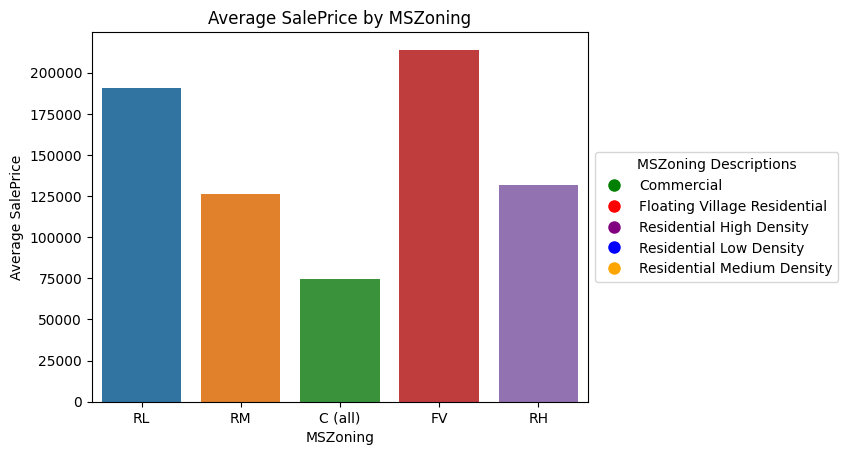

In [481]:
sns.barplot(x='MSZoning', y='SalePrice', data=train_df, ci=None)

plt.title('Average SalePrice by MSZoning')
plt.xlabel('MSZoning')
plt.ylabel('Average SalePrice')
plt.legend()
labels = {
    'C': 'Commercial',
    'FV': 'Floating Village Residential',
    'RH': 'Residential High Density',
    'RL': 'Residential Low Density',
    'RM': 'Residential Medium Density'
}
colours = {
    'C': 'green',
    'FV': 'red',
    'RH': 'purple',
    'RL': 'blue',
    'RM': 'orange'
}


handles = [plt.Line2D([0], [0], marker='o', color='w', label=labels[key], markersize=10, markerfacecolor=colours[key]) for key in labels]
plt.legend(handles=handles, title='MSZoning Descriptions',loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

/Users/omarkarame/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


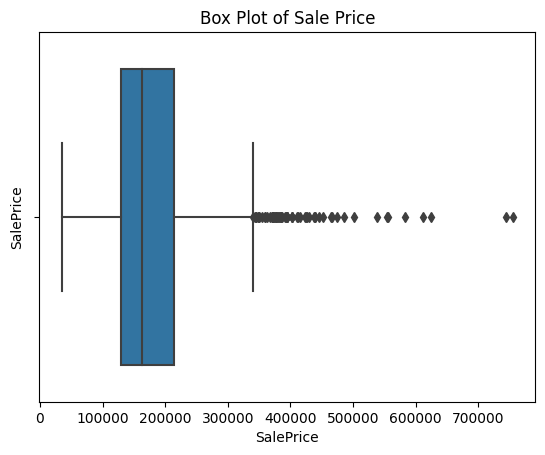

In [482]:
sns.boxplot(train_df['SalePrice'])
plt.title('Box Plot of Sale Price')
plt.ylabel('SalePrice')
plt.show()

In [483]:
train_numerical_df = train_df.select_dtypes('number')
train_numerical_features = train_numerical_df.columns
train_numerical_df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [484]:
train_numerical_features_list = train_numerical_features.tolist()
train_numerical_features_list.remove('MoSold')
train_numerical_features_list.remove('Id')
train_numerical_features_list

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'YrSold',
 'SalePrice']

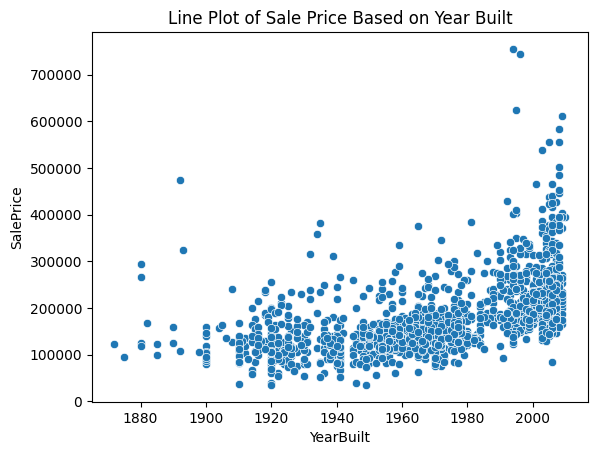

In [485]:
sns.scatterplot(x=train_df['YearBuilt'], y=train_df['SalePrice'])
plt.title('Line Plot of Sale Price Based on Year Built')
plt.show()

Unique Counts For Features

In [486]:
train_unique_counts = train_df.nunique()
train_unique_counts

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

 Sorted Unique Counts For Features

In [487]:
train_sorted_counts = train_unique_counts.sort_values()
train_sorted_counts

CentralAir         2
Utilities          2
Street             2
Alley              2
BsmtHalfBath       3
                ... 
1stFlrSF         753
BsmtUnfSF        780
GrLivArea        861
LotArea         1073
Id              1460
Length: 81, dtype: int64

Filtered Unique Counts For Features With Less Than 26 Unique Values

In [488]:
train_filtered_values = train_sorted_counts[train_sorted_counts < 26]
train_filtered_values

CentralAir       2
Utilities        2
Street           2
Alley            2
BsmtHalfBath     3
                ..
Exterior2nd     16
3SsnPorch       20
MiscVal         21
LowQualFinSF    24
Neighborhood    25
Length: 61, dtype: int64

In [489]:
train_filtered_values_features = train_filtered_values.index
train_filtered_values_features

Index(['CentralAir', 'Utilities', 'Street', 'Alley', 'BsmtHalfBath',
       'LandSlope', 'GarageFinish', 'HalfBath', 'PavedDrive', 'PoolQC',
       'FullBath', 'MasVnrType', 'BsmtExposure', 'ExterQual', 'MiscFeature',
       'BsmtFullBath', 'Fence', 'KitchenQual', 'BsmtCond', 'Fireplaces',
       'LandContour', 'LotShape', 'KitchenAbvGr', 'BsmtQual', 'FireplaceQu',
       'Electrical', 'YrSold', 'GarageCars', 'GarageQual', 'GarageCond',
       'HeatingQC', 'ExterCond', 'MSZoning', 'LotConfig', 'BldgType',
       'BsmtFinType2', 'Foundation', 'RoofStyle', 'SaleCondition',
       'GarageType', 'BsmtFinType1', 'Heating', 'Functional', 'RoofMatl',
       'HouseStyle', 'Condition2', 'PoolArea', 'BedroomAbvGr', 'SaleType',
       'Condition1', 'OverallCond', 'OverallQual', 'TotRmsAbvGrd', 'MoSold',
       'Exterior1st', 'MSSubClass', 'Exterior2nd', '3SsnPorch', 'MiscVal',
       'LowQualFinSF', 'Neighborhood'],
      dtype='object')

Categorical features in filtered unique counts that need to be preprocessed

In [490]:
categorical_filtered_values = train_df[train_filtered_values_features].select_dtypes(exclude='number')
categorical_filtered_values

,CentralAir,Utilities,Street,Alley,LandSlope,GarageFinish,PavedDrive,PoolQC,MasVnrType,BsmtExposure,...,Heating,Functional,RoofMatl,HouseStyle,Condition2,SaleType,Condition1,Exterior1st,Exterior2nd,Neighborhood
0,Y,AllPub,Pave,NaN,Gtl,RFn,Y,NaN,BrkFace,No,...,GasA,Typ,CompShg,2Story,Norm,WD,Norm,VinylSd,VinylSd,CollgCr
1,Y,AllPub,Pave,NaN,Gtl,RFn,Y,NaN,None,Gd,...,GasA,Typ,CompShg,1Story,Norm,WD,Feedr,MetalSd,MetalSd,Veenker
2,Y,AllPub,Pave,NaN,Gtl,RFn,Y,NaN,BrkFace,Mn,...,GasA,Typ,CompShg,2Story,Norm,WD,Norm,VinylSd,VinylSd,CollgCr
3,Y,AllPub,Pave,NaN,Gtl,Unf,Y,NaN,None,No,...,GasA,Typ,CompShg,2Story,Norm,WD,Norm,Wd Sdng,Wd Shng,Crawfor
4,Y,AllPub,Pave,NaN,Gtl,RFn,Y,NaN,BrkFace,Av,...,GasA,Typ,CompShg,2Story,Norm,WD,Norm,VinylSd,VinylSd,NoRidge
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,Y,AllPub,Pave,NaN,Gtl,RFn,Y,NaN,None,No,...,GasA,Typ,CompShg,2Story,Norm,WD,Norm,VinylSd,VinylSd,Gilbert
1456,Y,AllPub,Pave,NaN,Gtl,Unf,Y,NaN,Stone,No,...,GasA,Min1,CompShg,1Story,Norm,WD,Norm,Plywood,Plywood,NWAmes
1457,Y,AllPub,Pave,NaN,Gtl,RFn,Y,NaN,None,No,...,GasA,Typ,CompShg,2Story,Norm,WD,Norm,CemntBd,CmentBd,Crawfor
1458,Y,AllPub,Pave,NaN,Gtl,Unf,Y,NaN,None,Mn,...,GasA,Typ,CompShg,1Story,Norm,WD,Norm,MetalSd,MetalSd,NAmes


In [491]:
cat_data_filtered_list = categorical_filtered_values.columns.tolist()

In [492]:
cat_features_ordinalencode_2 = ['CentralAir']
cat_features_ordinalencode_3 = ['PavedDrive']
cat_features_ordinalencode_4 = ['Utilities', 'GarageFinish']
cat_features_ordinalencode_5 = ['PoolQC', 'ExterQual', 'ExterCond', 'BsmtExposure', 'HeatingQC', 'KitchenQual', 'Fence']
cat_features_ordinalencode_6 = ['BsmtQual', 'BsmtCond', 'FireplaceQu', 'GarageQual', 'GarageCond']
cat_features_ordinalencode_7 = ['BsmtFinType1', 'BsmtFinType2']

cat_features_onehotencode = ['MoSold', 'MSZoning','Street', 'Alley', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'LotConfig', 'BldgType', 'HouseStyle', 'MasVnrType', 'Foundation', 'SaleType', 'SaleCondition', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Electrical', 'Functional', 'GarageType', 'Heating', 'LandContour', 'LotShape', 'MiscFeature']


In [493]:
set_1 = set(cat_data_filtered_list)

set_2 = set(cat_features_ordinalencode_2 + cat_features_ordinalencode_3 + cat_features_ordinalencode_4 + cat_features_ordinalencode_5 + cat_features_ordinalencode_6 + cat_features_ordinalencode_7)

# set_1 - set_2

len(set_2)

18

In [494]:
# Create mappings for features that need to be ordinal encoded

central_air_mapping = {'N' : 0,'Y' : 1}

paved_drive_mapping = {'N' : 0,'P' : 1,'Y' : 2}

utilities_mapping = {'ELO' : 0,'NoSeWa' : 1,'NoSeWr' : 2,'AllPub' : 3}
train_df['GarageFinish'].fillna('Missing', inplace=True)
grarage_finish_mapping = {'Missing' : 0, 'Unf' : 1, 'RFn' : 2, 'Fin' : 3}

train_df['PoolQC'].fillna('Missing', inplace=True)
pool_qc_mapping = {'Missing' : 0, 'Fa' : 1, 'TA' : 2, 'Gd' : 3, 'Ex' : 4}
exter_qual_mapping = {'Po' : 0, 'Fa' : 1, 'TA' : 2, 'Gd' : 3, 'Ex' : 4}
exter_cond_mapping = {'Po' : 0, 'Fa' : 1, 'TA' : 2, 'Gd' : 3, 'Ex' : 4}
train_df['BsmtExposure'].fillna('Missing', inplace=True)
bsmt_exposure_mapping = {'Missing' : 0,'No' : 1,'Mn' : 2, 'Av' : 3,'Gd' : 4}
heating_qc_mapping = {'Po' : 0, 'Fa' : 1, 'TA' : 2, 'Gd' : 3, 'Ex' : 4}
kitchen_qual_mapping = {'Po' : 0, 'Fa' : 1, 'TA' : 2, 'Gd' : 3, 'Ex' : 4}
train_df['Fence'].fillna('Missing', inplace=True)
fence_mapping = {'Missing' : 0,'MnWw' : 1, 'GdWo' : 2, 'MnPrv' : 3, 'GdPrv' : 4}

train_df['BsmtQual'].fillna('Missing', inplace=True)
bsmt_qual_mapping = {'Missing' : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5}
train_df['BsmtCond'].fillna('Missing', inplace=True)
bsmt_cond_mapping = {'Missing' : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5}
train_df['FireplaceQu'].fillna('Missing', inplace=True)
fireplace_qu_mapping = {'Missing' : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5}
train_df['GarageQual'].fillna('Missing', inplace=True)
garage_qual_mapping = {'Missing' : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5}
train_df['GarageCond'].fillna('Missing', inplace=True)
garage_cond_mapping = {'Missing' : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5}

train_df['BsmtFinType1'].fillna('Missing', inplace=True)
bsmt_fin_type_1_mapping = {'Missing' : 0, 'Unf' : 1, 'LwQ' : 2, 'Rec' : 3, 'BLQ' : 4, 'ALQ' : 5, 'GLQ' : 6}
train_df['BsmtFinType2'].fillna('Missing', inplace=True)
bsmt_fin_type_2_mapping = {'Missing' : 0, 'Unf' : 1, 'LwQ' : 2, 'Rec' : 3, 'BLQ' : 4, 'ALQ' : 5, 'GLQ' : 6}

In [495]:
# Replace the data with encoded data

train_ordinal_encoded_df = pd.DataFrame()

train_ordinal_encoded_df['CentralAir'] = train_df['CentralAir'].map(central_air_mapping)
train_ordinal_encoded_df['PavedDrive'] = train_df['PavedDrive'].map(paved_drive_mapping)
train_ordinal_encoded_df['Utilities'] = train_df['Utilities'].map(utilities_mapping)
train_ordinal_encoded_df['GarageFinish'] = train_df['GarageFinish'].map(grarage_finish_mapping)
train_ordinal_encoded_df['PoolQC'] = train_df['PoolQC'].map(pool_qc_mapping)
train_ordinal_encoded_df['ExterQual'] = train_df['ExterQual'].map(exter_qual_mapping)
train_ordinal_encoded_df['ExterCond'] = train_df['ExterCond'].map(exter_cond_mapping)
train_ordinal_encoded_df['BsmtExposure'] = train_df['BsmtExposure'].map(bsmt_exposure_mapping)
train_ordinal_encoded_df['HeatingQC'] = train_df['HeatingQC'].map(heating_qc_mapping)
train_ordinal_encoded_df['KitchenQual'] = train_df['KitchenQual'].map(kitchen_qual_mapping)
train_ordinal_encoded_df['Fence'] = train_df['Fence'].map(fence_mapping)
train_ordinal_encoded_df['BsmtQual'] = train_df['BsmtQual'].map(bsmt_qual_mapping)
train_ordinal_encoded_df['BsmtCond'] = train_df['BsmtCond'].map(bsmt_cond_mapping)
train_ordinal_encoded_df['FireplaceQu'] = train_df['FireplaceQu'].map(fireplace_qu_mapping)
train_ordinal_encoded_df['GarageQual'] = train_df['GarageQual'].map(garage_qual_mapping)
train_ordinal_encoded_df['GarageCond'] = train_df['GarageCond'].map(garage_cond_mapping)
train_ordinal_encoded_df['BsmtFinType1'] = train_df['BsmtFinType1'].map(bsmt_fin_type_1_mapping)
train_ordinal_encoded_df['BsmtFinType2'] = train_df['BsmtFinType2'].map(bsmt_fin_type_2_mapping)

train_ordinal_encoded_df['Id'] = train_df['Id']

train_ordinal_encoded_df

,CentralAir,PavedDrive,Utilities,GarageFinish,PoolQC,ExterQual,ExterCond,BsmtExposure,HeatingQC,KitchenQual,Fence,BsmtQual,BsmtCond,FireplaceQu,GarageQual,GarageCond,BsmtFinType1,BsmtFinType2,Id
0,1,2,3,2,0,3,2,1,4,3,0,4,3,0,3,3,6,1,1
1,1,2,3,2,0,2,2,4,4,2,0,4,3,3,3,3,5,1,2
2,1,2,3,2,0,3,2,2,4,3,0,4,3,3,3,3,6,1,3
3,1,2,3,1,0,2,2,1,3,3,0,3,4,4,3,3,5,1,4
4,1,2,3,2,0,3,2,3,4,3,0,4,3,3,3,3,6,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1,2,3,2,0,2,2,1,4,2,0,4,3,3,3,3,1,1,1456
1456,1,2,3,1,0,2,2,1,2,2,3,4,3,3,3,3,5,3,1457
1457,1,2,3,2,0,4,3,1,4,3,4,3,4,4,3,3,6,1,1458
1458,1,2,3,1,0,2,2,2,3,3,0,3,3,0,3,3,6,3,1459


In [496]:
train_df[cat_features_onehotencode] = train_df[cat_features_onehotencode].fillna('Missing')

train_onehot_encoded_df = pd.get_dummies(train_df, columns=cat_features_onehotencode, drop_first=True)
train_onehot_encoded_df = train_onehot_encoded_df.drop(columns=list(set_2)).drop(columns=train_numerical_features_list)
train_cat_encoded_df = pd.merge(train_onehot_encoded_df, train_ordinal_encoded_df, how='outer', on='Id')

train_cat_encoded_df

,Id,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,...,HeatingQC,KitchenQual,Fence,BsmtQual,BsmtCond,FireplaceQu,GarageQual,GarageCond,BsmtFinType1,BsmtFinType2
0,1,1,0,0,0,0,0,0,0,0,...,4,3,0,4,3,0,3,3,6,1
1,2,0,0,0,1,0,0,0,0,0,...,4,2,0,4,3,3,3,3,5,1
2,3,0,0,0,0,0,0,0,1,0,...,4,3,0,4,3,3,3,3,6,1
3,4,1,0,0,0,0,0,0,0,0,...,3,3,0,3,4,4,3,3,5,1
4,5,0,0,0,0,0,0,0,0,0,...,4,3,0,4,3,3,3,3,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,0,0,0,0,0,0,1,0,0,...,4,2,0,4,3,3,3,3,1,1
1456,1457,1,0,0,0,0,0,0,0,0,...,2,2,3,4,3,3,3,3,5,3
1457,1458,0,0,0,1,0,0,0,0,0,...,4,3,4,3,4,4,3,3,6,1
1458,1459,0,0,1,0,0,0,0,0,0,...,3,3,0,3,3,0,3,3,6,3


In [497]:
# train_numerical_df.drop(columns='Id').columns

In [498]:
current_year = 2023 
train_numerical_df['YearBuilt'] = current_year - train_numerical_df['YearBuilt']
train_numerical_df['YearRemodAdd'] = current_year - train_numerical_df['YearRemodAdd']
train_numerical_df['YrSold'] = current_year - train_numerical_df['YrSold']
train_numerical_df = train_numerical_df.drop(columns=['Id', 'SalePrice'])

In [499]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

train_numerical_scaled_df = pd.DataFrame(scaler.fit_transform(train_numerical_df), columns=train_numerical_df.columns)
train_numerical_scaled_df['Id'] = train_df['Id']
train_numerical_scaled_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Id
0,0.2,-0.190476,-0.254076,0.5,0.0,-0.652174,-0.243243,1.180723,0.452790,0.0,...,0.000000,0.529412,0.0,0.0,0.0,0.0,0.0,-1.333333,0.0,1
1,-0.6,0.523810,0.030015,0.0,3.0,-0.065217,0.486486,0.000000,0.834679,0.0,...,1.773810,-0.367647,0.0,0.0,0.0,0.0,0.0,-0.333333,0.5,2
2,0.2,-0.047619,0.437624,0.5,0.0,-0.608696,-0.216216,0.975904,0.143910,0.0,...,0.000000,0.250000,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,3
3,0.4,-0.428571,0.017663,0.5,0.0,1.260870,0.648649,0.000000,-0.235170,0.0,...,0.000000,0.147059,272.0,0.0,0.0,0.0,0.0,-1.333333,1.0,4
4,0.2,0.714286,1.181201,1.0,0.0,-0.586957,-0.162162,2.108434,0.381186,0.0,...,1.142857,0.867647,0.0,0.0,0.0,0.0,0.0,2.000000,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.2,-0.333333,-0.385746,0.0,0.0,-0.565217,-0.162162,0.000000,-0.538435,0.0,...,0.000000,0.220588,0.0,0.0,0.0,0.0,0.0,0.666667,0.5,1456
1456,-0.6,0.761905,0.913167,0.0,1.0,-0.108696,0.162162,0.716867,0.570727,163.0,...,2.077381,-0.367647,0.0,0.0,0.0,0.0,0.0,-1.333333,-1.0,1457
1457,0.4,-0.142857,-0.107831,0.5,4.0,0.695652,-0.324324,0.000000,-0.152334,0.0,...,0.000000,0.514706,0.0,0.0,0.0,0.0,2500.0,-0.333333,-1.0,1458
1458,-0.6,-0.047619,0.058918,-0.5,1.0,0.500000,-0.054054,0.000000,-0.469638,1029.0,...,2.178571,-0.367647,112.0,0.0,0.0,0.0,0.0,-0.666667,-1.0,1459


In [500]:
train_final_preproc_df = pd.merge(train_cat_encoded_df, train_numerical_scaled_df, how='outer', on='Id')
train_final_preproc_df = train_final_preproc_df.drop(columns='Id')

In [502]:
X_train = train_final_preproc_df[:]
y_train = train_df['SalePrice']

test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

baseline_model = XGBRegressor()

scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validated MSE: {-scores.mean()} +/- {scores.std()}")

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
y_pred